<a href="https://colab.research.google.com/github/Abhilash0201/Abhilash-infosys-Nov24/blob/main/FutureCart%20WEEK-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK-1

DATA COLLECTION


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
product1=pd.read_excel(r'/content/drive/MyDrive/infosys/ProductA.xlsx')
product1.head()

,Day Index,Quantity
0,2021-12-01,14
1,2021-12-02,10
2,2021-12-03,13
3,2021-12-04,22
4,2021-12-05,33


FACEBOOK IMPRESSIONS DATA

In [ ]:
facebook_impressions=pd.read_excel(r'/content/drive/MyDrive/infosys/ProductA_fb_impressions.xlsx')
facebook_impressions.head()

,Day Index,Impressions
0,2021-12-01,620
1,2021-12-02,890
2,2021-12-03,851
3,2021-12-04,881
4,2021-12-05,678


GOOGLE CLICKS DATA

In [ ]:
google_clicks=pd.read_excel(r'/content/drive/MyDrive/infosys/ProductA_google_clicks.xlsx')
google_clicks.head()

,Day Index,Clicks
0,2021-12-01,445
1,2021-12-02,433
2,2021-12-03,424
3,2021-12-04,427
4,2021-12-05,451


MERGING DATA

In [ ]:
mergeddata = pd.merge(product1,facebook_impressions , on="Day Index", how="left")
masterdata = pd.merge(mergeddata,google_clicks, on="Day Index", how="left")
masterdata.head()
print(masterdata)

     Day Index  Quantity  Impressions  Clicks
0   2021-12-01        14          620     445
1   2021-12-02        10          890     433
2   2021-12-03        13          851     424
3   2021-12-04        22          881     427
4   2021-12-05        33          678     451
..         ...       ...          ...     ...
207 2022-06-26        13         1218     114
208 2022-06-27        16         1311     106
209 2022-06-28        13          885     109
210 2022-06-29        16         1000      60
211 2022-06-30         8          875      65

[212 rows x 4 columns]


In [ ]:
file_path = '/content/drive/My Drive/infosys/ProductA_masterdata.xlsx'
masterdata.to_excel(file_path, index=False)
print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/infosys/ProductA_masterdata.xlsx


CHECKS ON TRENDS

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Summary for Quantity:
count    212.000000
mean      17.542453
std        5.790423
min        5.000000
25%       13.750000
50%       17.000000
75%       21.000000
max       38.000000
Name: Quantity, dtype: float64


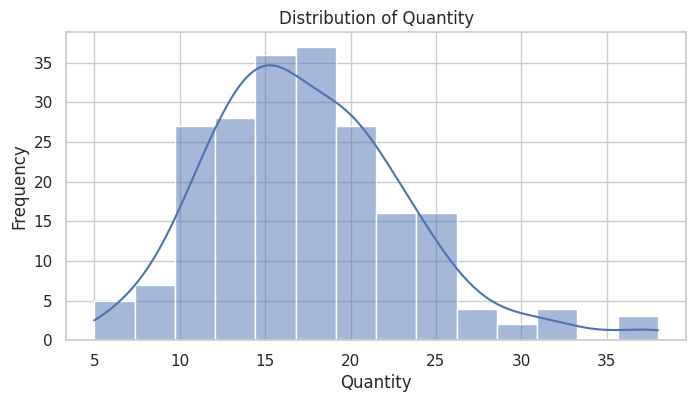


Summary for Impressions:
count     212.000000
mean     1531.702830
std       440.660783
min       620.000000
25%      1209.750000
50%      1460.000000
75%      1862.000000
max      2707.000000
Name: Impressions, dtype: float64


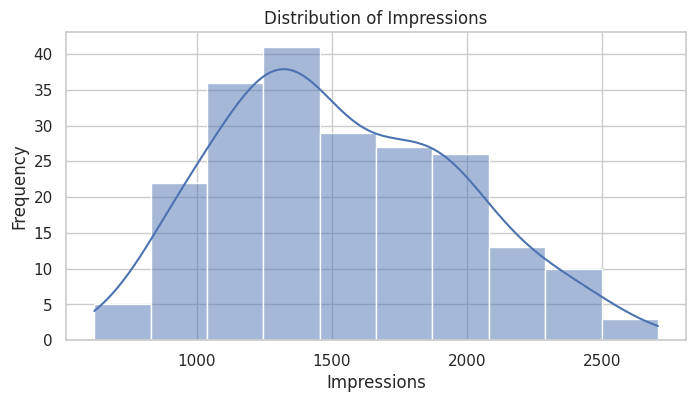


Summary for Clicks:
count    212.00000
mean     358.20283
std      164.52160
min       60.00000
25%      154.00000
50%      402.50000
75%      492.75000
max      726.00000
Name: Clicks, dtype: float64


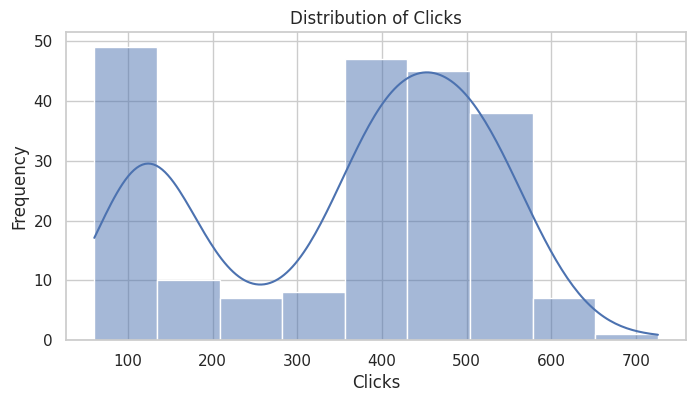

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

# Accessing Google Drive if you're using Google Colab
drive.mount('/content/drive')

# Path to the dataset
file_location = '/content/drive/MyDrive/infosys/ProductA_masterdata.xlsx'
data = pd.read_excel(file_location, sheet_name='Sheet1')

# Visualize distribution of selected columns with summary insights
columns_to_plot = ['Quantity', 'Impressions', 'Clicks']
for feature in columns_to_plot:
    # Displaying summary statistics
    print(f"\nSummary for {feature}:")
    print(data[feature].describe())

    # Plotting with Seaborn for visual analysis
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


DETECTING MISSING VALUES

In [44]:
import pandas as pd

# Loading the uploaded Excel file

data = pd.read_excel('/content/drive/MyDrive/infosys/ProductA_masterdata.xlsx')

# Finding missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


BOX PLOTS

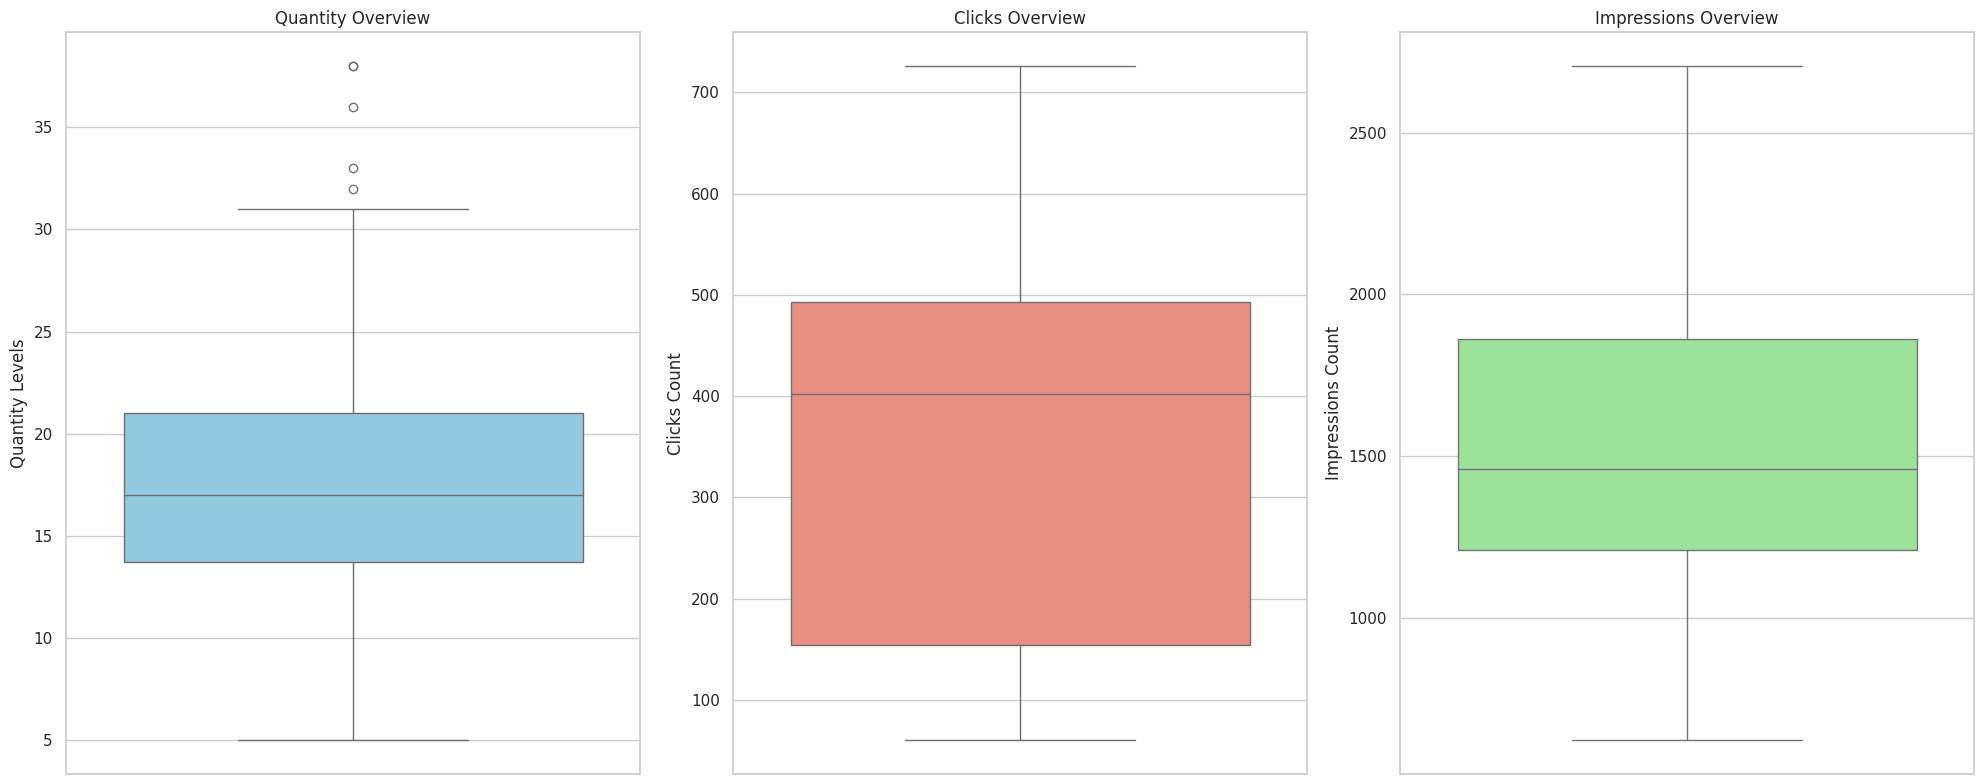

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path and read the dataset
dataset_path = '/content/drive/MyDrive/infosys/ProductA_masterdata.xlsx'
product_data = pd.read_excel(dataset_path)

# Set up a consistent visual theme for Seaborn plots
sns.set_theme(style="whitegrid")

# Initialize a large figure for subplots
plt.figure(figsize=(20, 8))

# Plot 1: Boxplot for 'Quantity'
plt.subplot(1, 3, 1)
sns.boxplot(y=product_data['Quantity'], color='skyblue')
plt.title('Quantity Overview')
plt.ylabel('Quantity Levels')

# Plot 2: Boxplot for 'Clicks'
plt.subplot(1, 3, 2)
sns.boxplot(y=product_data['Clicks'], color='salmon')
plt.title('Clicks Overview')
plt.ylabel('Clicks Count')

# Plot 3: Boxplot for 'Impressions'
plt.subplot(1, 3, 3)
sns.boxplot(y=product_data['Impressions'], color='lightgreen')
plt.title('Impressions Overview')
plt.ylabel('Impressions Count')

# Layout adjustments for clear presentation
plt.tight_layout()
plt.show()


SALES QUANTITY THROUGH TIME

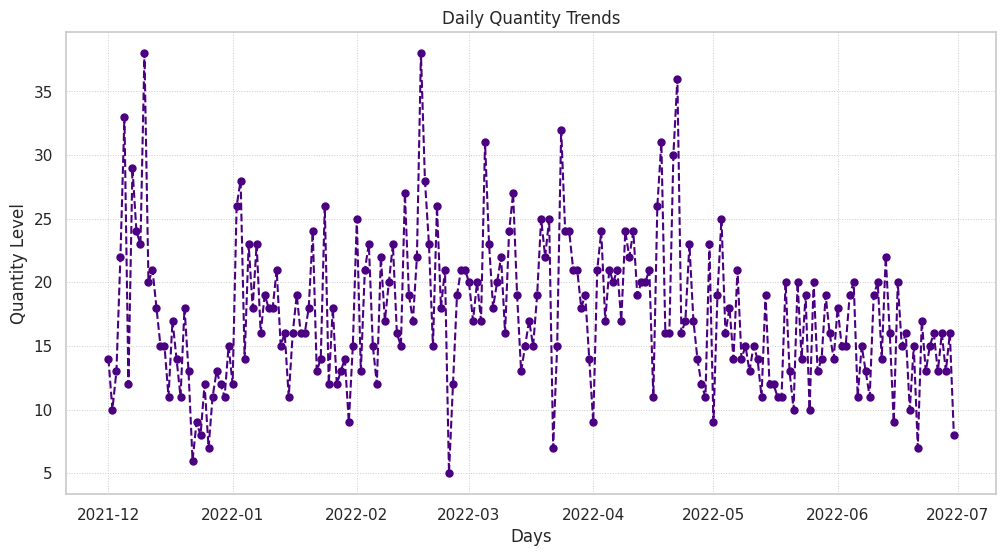

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the dataset
data_path = '/content/drive/MyDrive/infosys/ProductA_mergedata.xlsx'
# data = pd.read_excel(data_path)

# Line plot for 'Quantity' over time (indexed by 'Day Index')
plt.figure(figsize=(12, 6))
plt.plot(data['Day Index'], data['Quantity'], color='indigo', marker='o', linestyle='--', linewidth=1.5, markersize=5)
plt.title('Daily Quantity Trends')
plt.xlabel('Days')
plt.ylabel('Quantity Level')
plt.grid(True, linestyle=':', linewidth=0.7)
plt.show()


FINDING OUTLIERS

In [9]:
import pandas as pd

# Load data from the Excel file
data = pd.read_excel('/content/drive/MyDrive/infosys/ProductA_masterdata.xlsx')

# Function to detect outliers using the IQR method
def detect_outliers_iqr(data_column):
    q1 = data_column.quantile(0.25)
    q3 = data_column.quantile(0.75)
    iqr_value = q3 - q1

    # Outliers lie outside 1.5*IQR from Q1 and Q3
    outlier_points = data_column[(data_column < (q1 - 1.5 * iqr_value)) | (data_column > (q3 + 1.5 * iqr_value))]
    return outlier_points

# Display the count of outliers in each selected column
print("Outlier Counts for Key Columns:")
print(f"Quantity:      {len(detect_outliers_iqr(data['Quantity']))} outliers")
print(f"Clicks:        {len(detect_outliers_iqr(data['Clicks']))} outliers")
print(f"Impressions:   {len(detect_outliers_iqr(data['Impressions']))} outliers")


Outlier Counts for Key Columns:
Quantity:      5 outliers
Clicks:        0 outliers
Impressions:   0 outliers


In [ ]:
print(f"Quantity:\n{find_outliers_IQR(df['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


OUTLAIERS IN QUALITY ATTRIBUTES ARE 5

In [17]:
percentile_95_value =df["Quantity"].quantile(0.87)
print(percentile_95_value)

24.0


REPLACING OUTLAYERS

In [19]:
import pandas as pd

# Function to cap outliers based on the 87th percentile value for outliers beyond the IQR range
def cap_outliers_iqr(data_series):
    q1, q3 = data_series.quantile([0.25, 0.75])
    iqr_range = q3 - q1
    lower_cutoff = q1 - 1.5 * iqr_range
    upper_cutoff = q3 + 1.5 * iqr_range
    cap_value = data_series.quantile(0.87)

    # Replace outliers with the 87th percentile value
    return data_series.apply(lambda value: cap_value if value < lower_cutoff or value > upper_cutoff else value)

# Apply the outlier capping function to the 'Quantity' column and create a new column
data['Quantity_capped'] = cap_outliers_iqr(data['Quantity'])

print(data.head())

# Save the modified dataset to an Excel file named 'cleaned_data.xlsx'
output_path = '/content/drive/MyDrive/infosys/cleaned_data.xlsx'
data.to_excel(output_path, index=False)

print("The modified dataset has been saved as 'cleaned_data.xlsx'")


   Day Index  Quantity  Impressions  Clicks  Quantity_capped
0 2021-12-01        14          620     445             14.0
1 2021-12-02        10          890     433             10.0
2 2021-12-03        13          851     424             13.0
3 2021-12-04        22          881     427             22.0
4 2021-12-05        33          678     451             24.0
The modified dataset has been saved as 'cleaned_data.xlsx'


AFTER OUTLAIERS TREATMENT

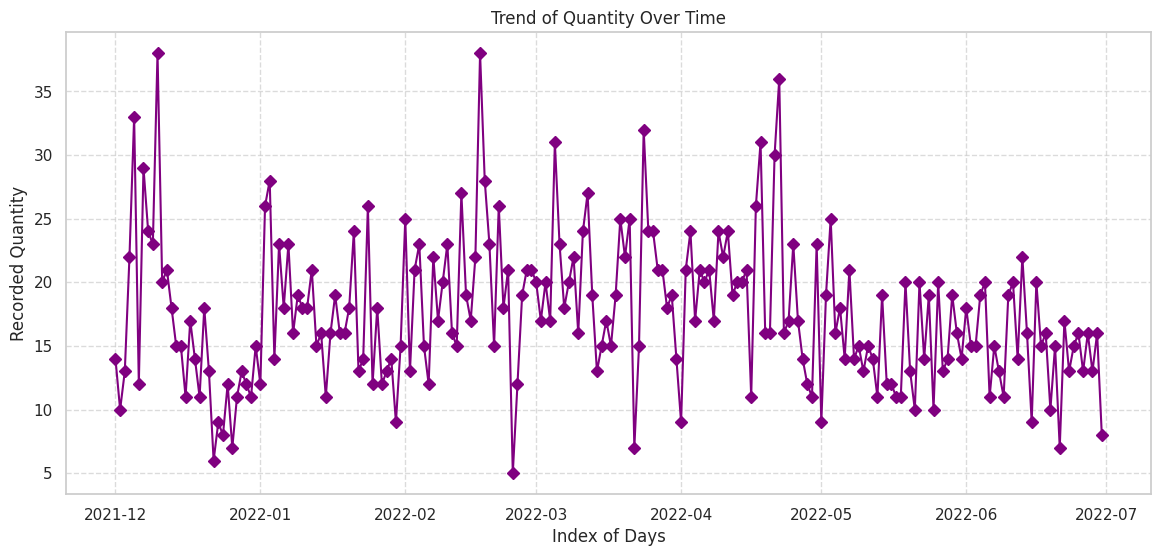

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Define path and load the Excel dataset
dataset_path = '/content/drive/MyDrive/Data/cleaN.xlsx'
# data = pd.read_excel(dataset_path)

# Plotting 'Quantity' across 'Day Index' to show trends over time
plt.figure(figsize=(14, 6))
plt.plot(data['Day Index'], data['Quantity'], color='purple', marker='D', linestyle='-', linewidth=1.5, markersize=6)
plt.title('Trend of Quantity Over Time')
plt.xlabel('Index of Days')
plt.ylabel('Recorded Quantity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


FEATURE ENGINEERING

In [24]:
import pandas as pd

# Load the dataset from the specified path
data_path = '/content/drive/MyDrive/infosys/clean.xlsx'
data = pd.read_excel(data_path)

# Convert 'Day Index' to datetime format for easier date operations
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Add a 'Weekend' column where 1 indicates Saturday/Sunday and 0 otherwise
data['Weekend'] = data['Day Index'].dt.weekday.isin([5, 6]).astype(int)

# Extract and add the 'Day of Week' and 'Month' names to the dataset
data['Day of Week'] = data['Day Index'].dt.day_name()
data['Month Name'] = data['Day Index'].dt.month_name()

# Create one-hot encoded columns for the 'Day of Week'
week_days_one_hot = pd.get_dummies(data['Day of Week'], prefix='Day').astype(int)

# Create one-hot encoded columns for the 'Month Name'
months_one_hot = pd.get_dummies(data['Month Name'], prefix='Month').astype(int)

# Concatenate the original data with the new one-hot encoded columns
data = pd.concat([data, week_days_one_hot, months_one_hot], axis=1)

# Save the enhanced dataset to a new Excel file
output_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
data.to_excel(output_path, index=False)

print("Enhanced dataset saved to 'enhanced_data.xlsx'")


Enhanced dataset saved to 'enhanced_data.xlsx'


ADDING NEW COLUMNS TO DATASET

In [25]:
import pandas as pd

# Load the enhanced dataset from the specified path
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
df = pd.read_excel(file_path)

# Configure pandas to display all rows and columns for better visualization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the entire dataset to examine its contents
df.head(len(df))


,Day Index,Quantity,Impressions,Clicks,imputed_Quantity,Weekend,Day of Week,Month Name,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_December,Month_February,Month_January,Month_June,Month_March,Month_May
0,2021-12-01,14,620,445,14,0,Wednesday,December,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,2021-12-02,10,890,433,10,0,Thursday,December,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,2021-12-03,13,851,424,13,0,Friday,December,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2021-12-04,22,881,427,22,1,Saturday,December,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,2021-12-05,33,678,451,24,1,Sunday,December,0,0,0,1,0,0,0,0,1,0,0,0,0,0
5,2021-12-06,12,995,429,12,0,Monday,December,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6,2021-12-07,29,910,444,29,0,Tuesday,December,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,2021-12-08,24,867,431,24,0,Wednesday,December,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8,2021-12-09,23,1128,456,23,0,Thursday,December,0,0,0,0,1,0,0,0,1,0,0,0,0,0
9,2021-12-10,38,1129,391,24,0,Friday,December,1,0,0,0,0,0,0,0,1,0,0,0,0,0


STATISTICS

In [26]:
import pandas as pd
from tabulate import tabulate

# Load the dataset from the specified file path
dataset_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
data = pd.read_excel(dataset_path)

# Calculate summary statistics of the dataset
summary_stats = data.describe()

# Print the statistics in a clean, formatted table
print(tabulate(summary_stats, headers='keys', tablefmt='fancy_grid'))


╒═══════╤═════════════════════╤════════════╤═══════════════╤══════════╤════════════════════╤════════════╤══════════════╤══════════════╤════════════════╤══════════════╤════════════════╤═══════════════╤═════════════════╤═══════════════╤══════════════════╤══════════════════╤═════════════════╤══════════════╤═══════════════╤═════════════╕
│       │ Day Index           │   Quantity │   Impressions │   Clicks │   imputed_Quantity │    Weekend │   Day_Friday │   Day_Monday │   Day_Saturday │   Day_Sunday │   Day_Thursday │   Day_Tuesday │   Day_Wednesday │   Month_April │   Month_December │   Month_February │   Month_January │   Month_June │   Month_March │   Month_May │
╞═══════╪═════════════════════╪════════════╪═══════════════╪══════════╪════════════════════╪════════════╪══════════════╪══════════════╪════════════════╪══════════════╪════════════════╪═══════════════╪═════════════════╪═══════════════╪══════════════════╪══════════════════╪═════════════════╪══════════════╪═══════════════╪═══════

DATA ANALYSIS


DAY WISE ANALYSIS THROUGH TIME

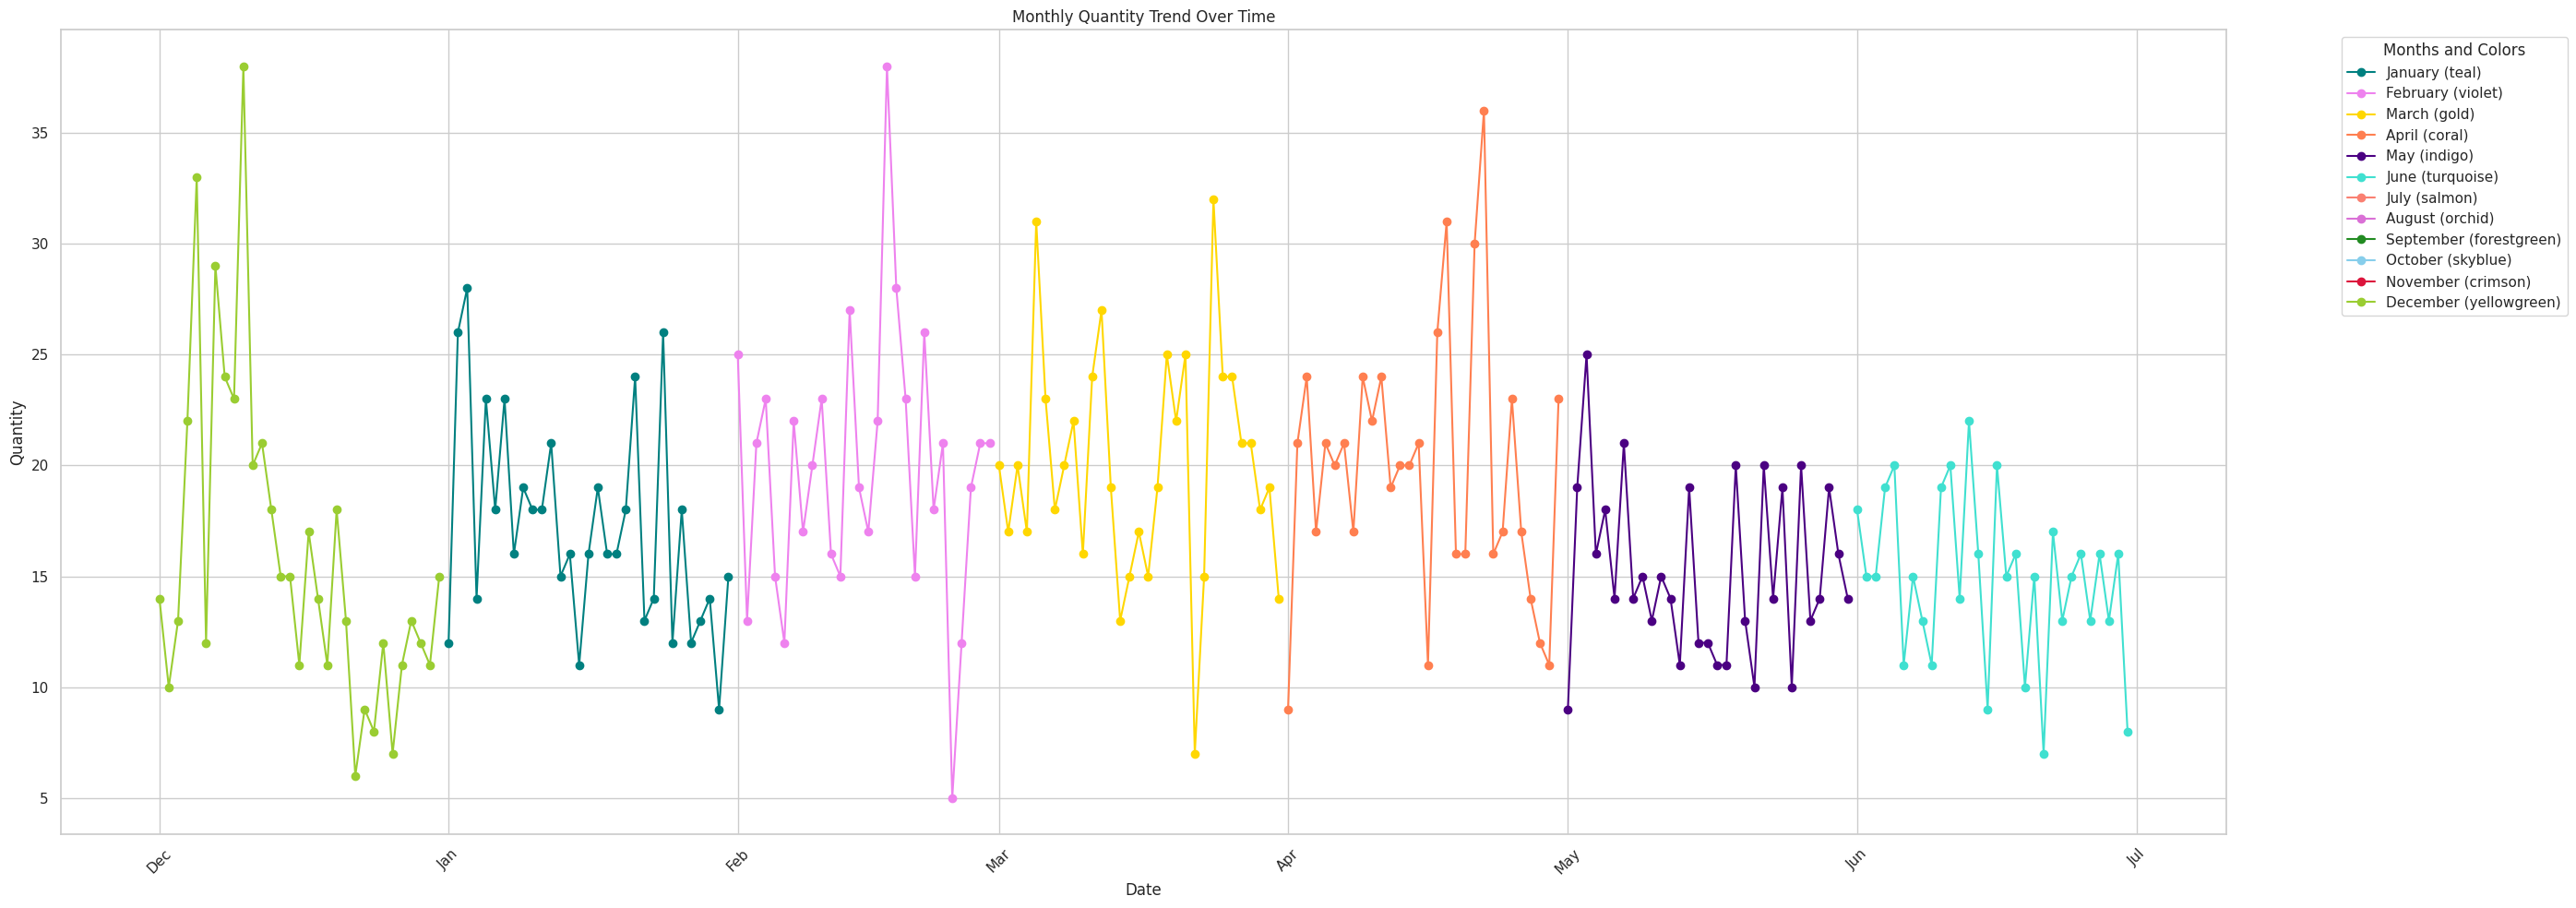

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Load the dataset from the specified path
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
data = pd.read_excel(file_path)

# Ensure 'Day Index' is in datetime format for proper plotting
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Create a new column for the month number to facilitate grouping
data['Month Number'] = data['Day Index'].dt.month

# Define new colors for each month
month_colors = [
    "teal", "violet", "gold", "coral", "indigo", "turquoise",
    "salmon", "orchid", "forestgreen", "skyblue", "crimson", "yellowgreen"
]
month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plotting data for each month with distinct colors and markers
plt.figure(figsize=(28, 10))
for month, color in zip(range(1, 13), month_colors):
    monthly_data = data[data['Month Number'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Quantity'], marker='o', linestyle='-',
             color=color, label=f"{month_names[month-1]} ({color})")

# Customize the plot's title, labels, and legend
plt.title("Monthly Quantity Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity")

# Format x-axis dates and rotate them for better visibility
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)

# Add legend and adjust layout for clarity
plt.legend(title="Months and Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


DAILY TRENDS FOR CLICKS THROUGH TIME

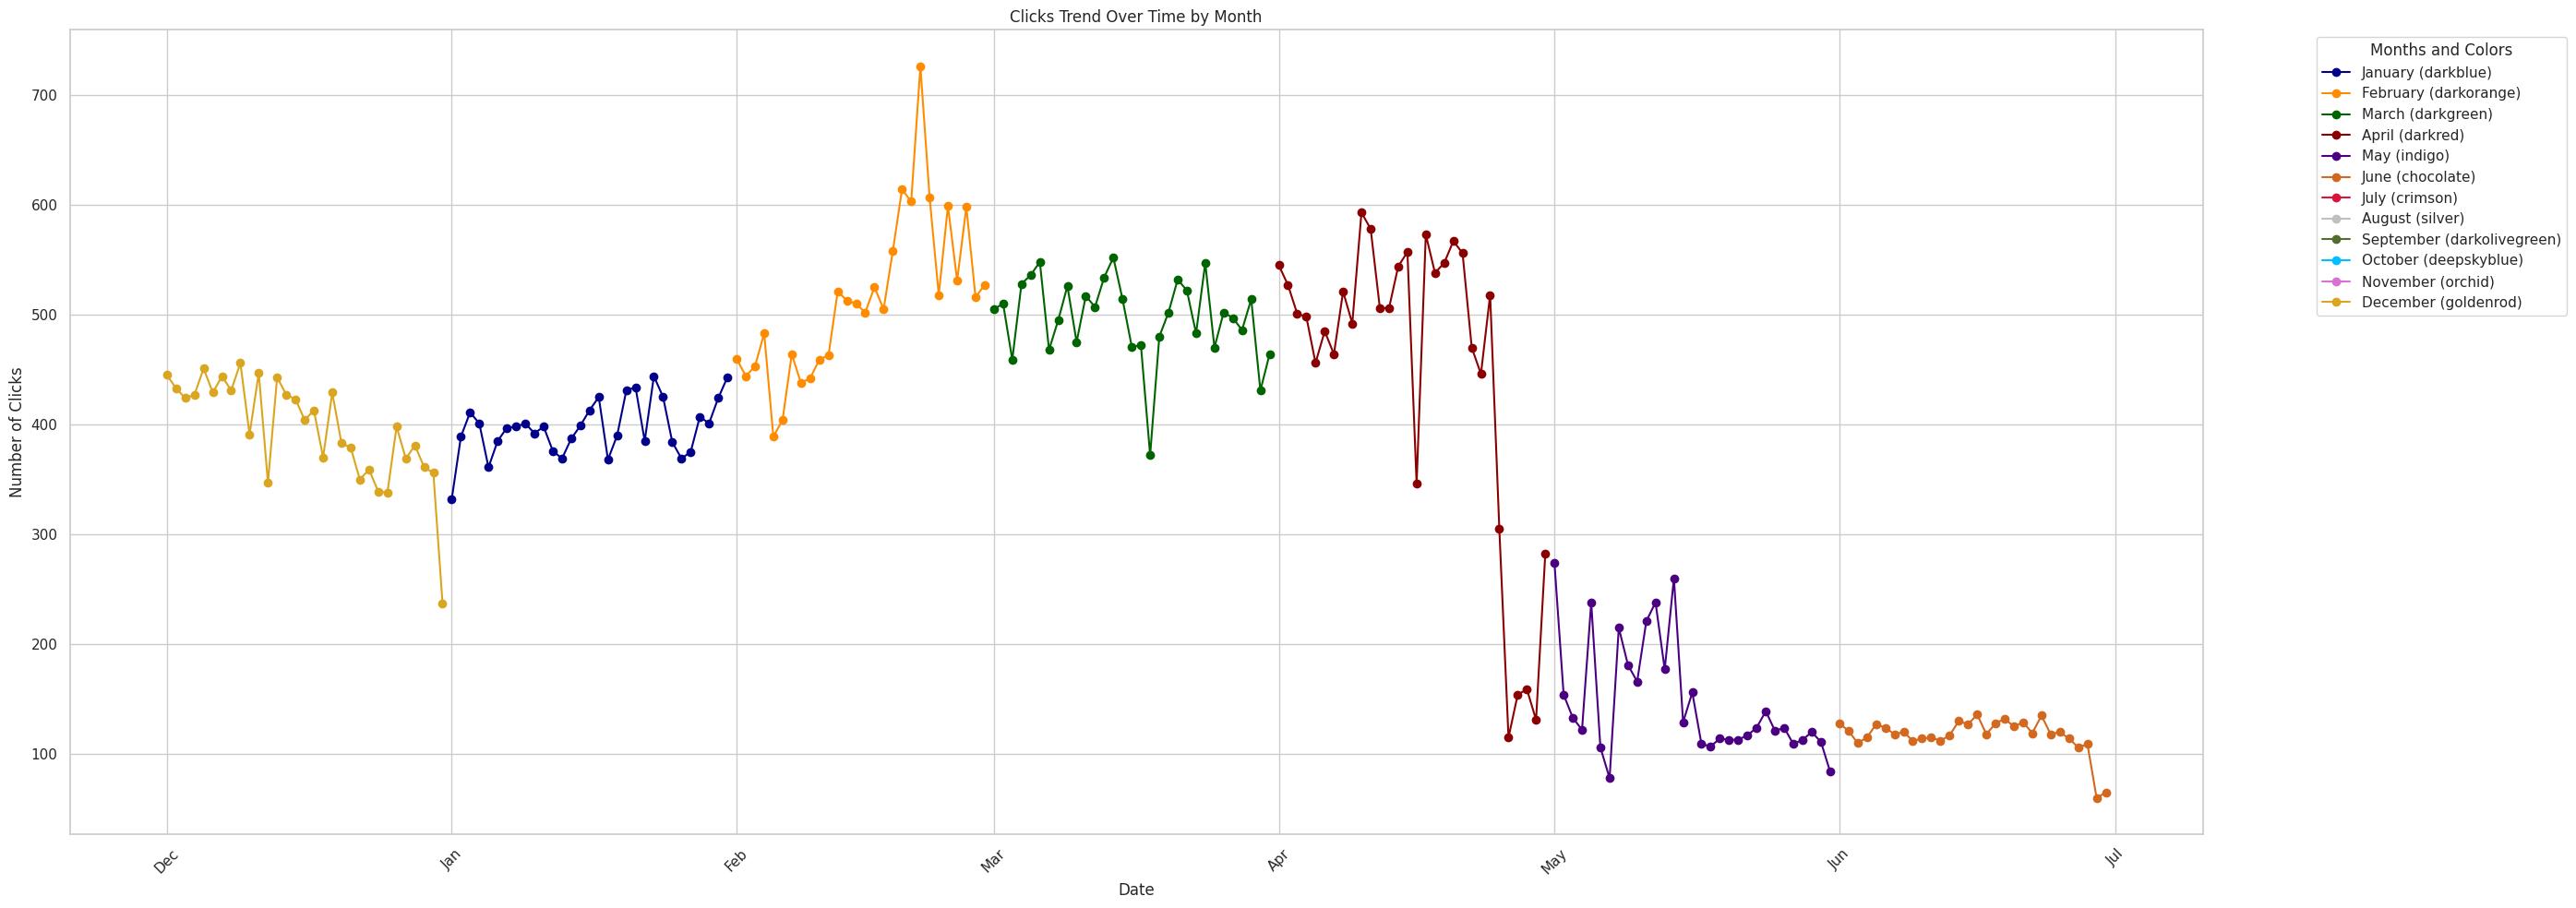

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
data = pd.read_excel(file_path)

# Ensure 'Day Index' is in datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Adding a 'Month' column for easy grouping
data['Month Number'] = data['Day Index'].dt.month

# Define a new color palette for each month
new_colors = [
    "darkblue", "darkorange", "darkgreen", "darkred", "indigo", "chocolate",
    "crimson", "silver", "darkolivegreen", "deepskyblue", "orchid", "goldenrod"
]
month_labels = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plotting the data with different colors for each month
plt.figure(figsize=(28, 10))
for month, color in zip(range(1, 13), new_colors):
    month_data = data[data['Month Number'] == month]
    plt.plot(month_data['Day Index'], month_data['Clicks'], marker='o', linestyle='-',
             color=color, label=f"{month_labels[month-1]} ({color})")

# Customize the plot's title, x-axis, and y-axis labels
plt.title("Clicks Trend Over Time by Month")
plt.xlabel("Date")
plt.ylabel("Number of Clicks")

# Format x-axis to display months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)

# Display the legend and adjust layout for clarity
plt.legend(title="Months and Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()



DAY WISE TRENDS FOR IMPRESSION THROUGH TIME

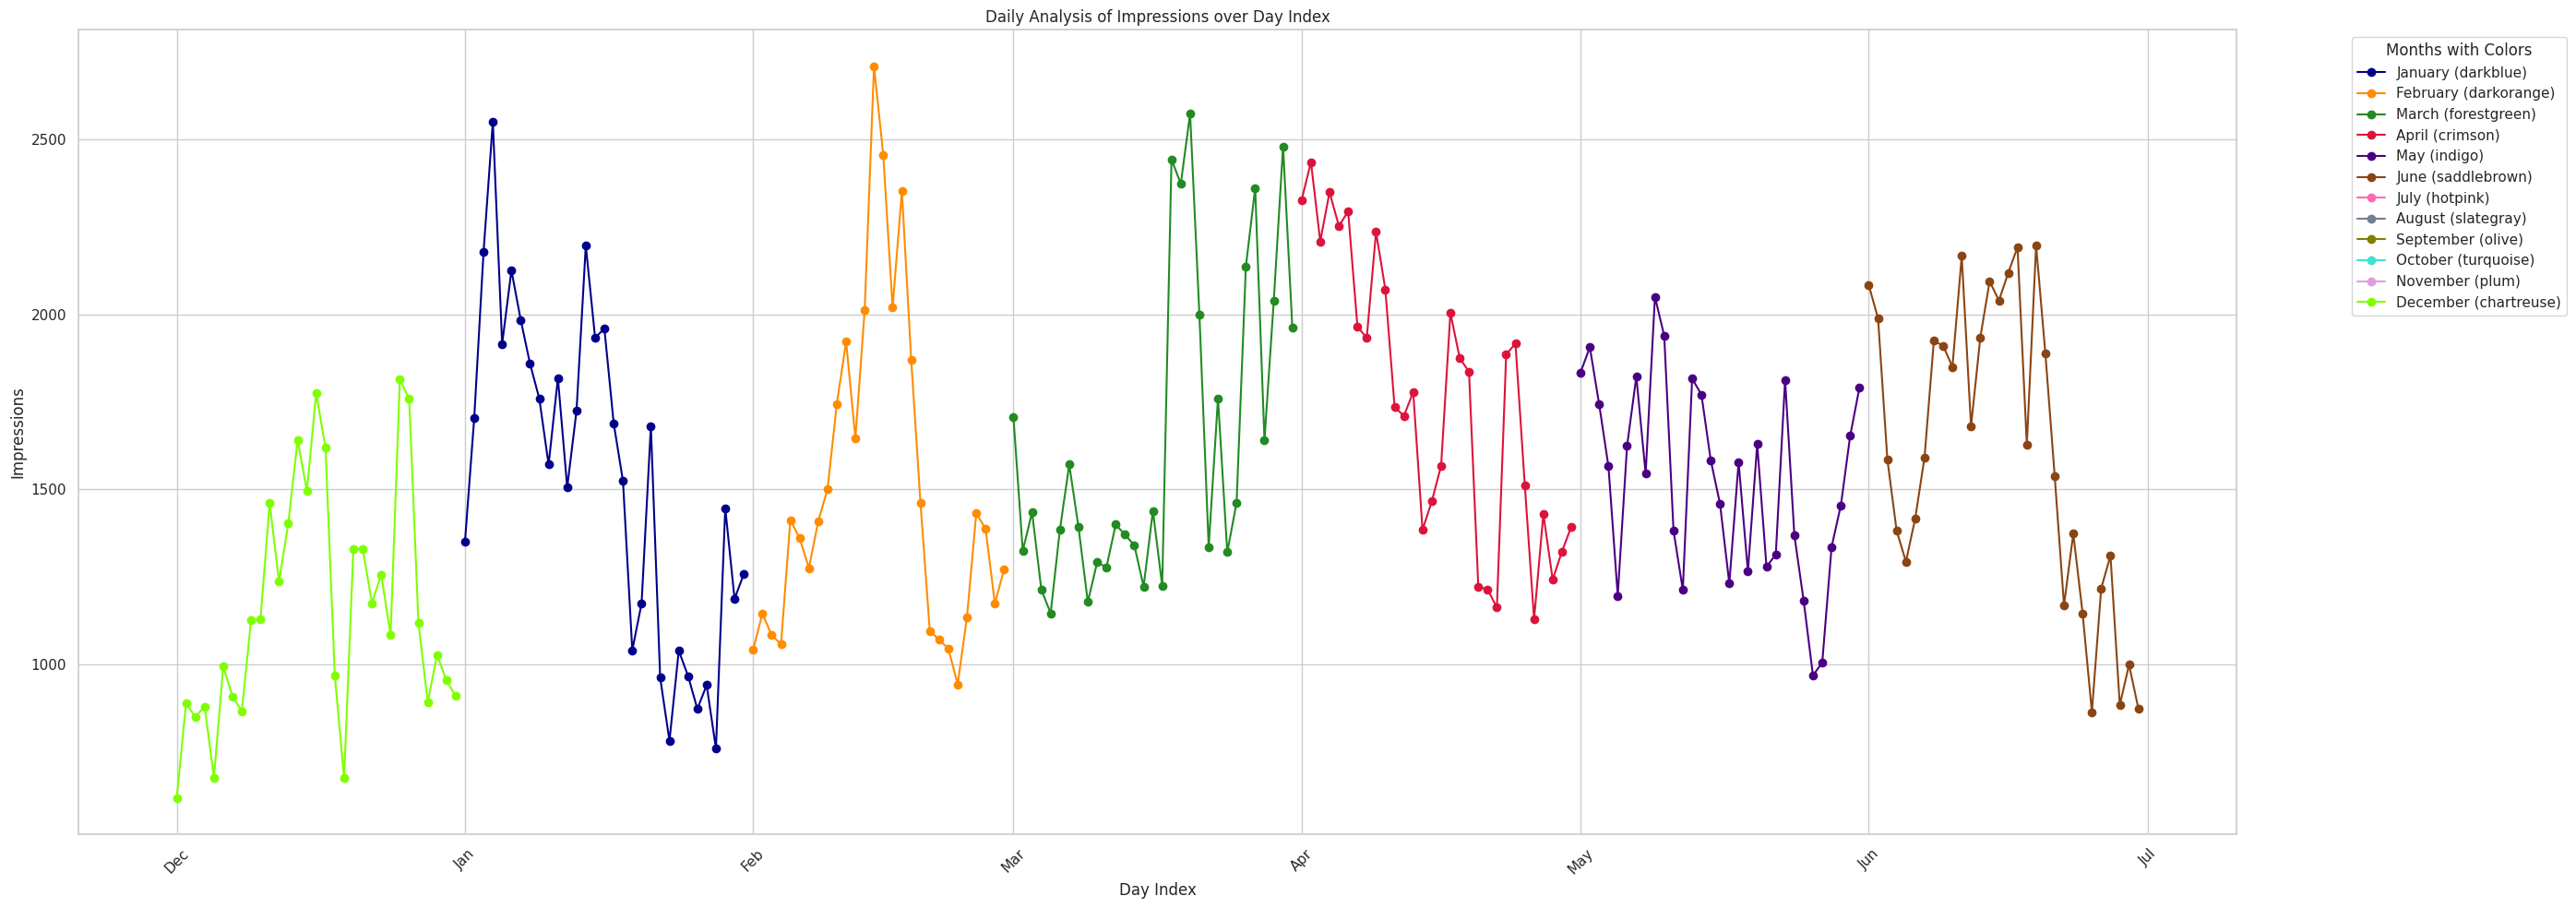

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
data = pd.read_excel(file_path)

# Ensure 'Day Index' is in datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Adding a 'Month' column for easy grouping
data['Month'] = data['Day Index'].dt.month

# Define a new color palette for each month
new_colors = [
    "darkblue", "darkorange", "forestgreen", "crimson", "indigo", "saddlebrown",
    "hotpink", "slategray", "olive", "turquoise", "plum", "chartreuse"
]
month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plot the data with different colors for each month
plt.figure(figsize=(28, 10))
for month, color in zip(range(1, 13), new_colors):
    monthly_data = data[data['Month'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Impressions'], marker='o', linestyle='-',
             color=color, label=f"{month_names[month-1]} ({color})")

# Customize the plot's title, x-axis, and y-axis labels
plt.title("Daily Analysis of Impressions over Day Index")
plt.xlabel("Day Index")
plt.ylabel("Impressions")

# Format the x-axis to display months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)

# Display the legend and adjust layout for clarity
plt.legend(title="Months with Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


WEEKLY DEMANDS AND TRENDS

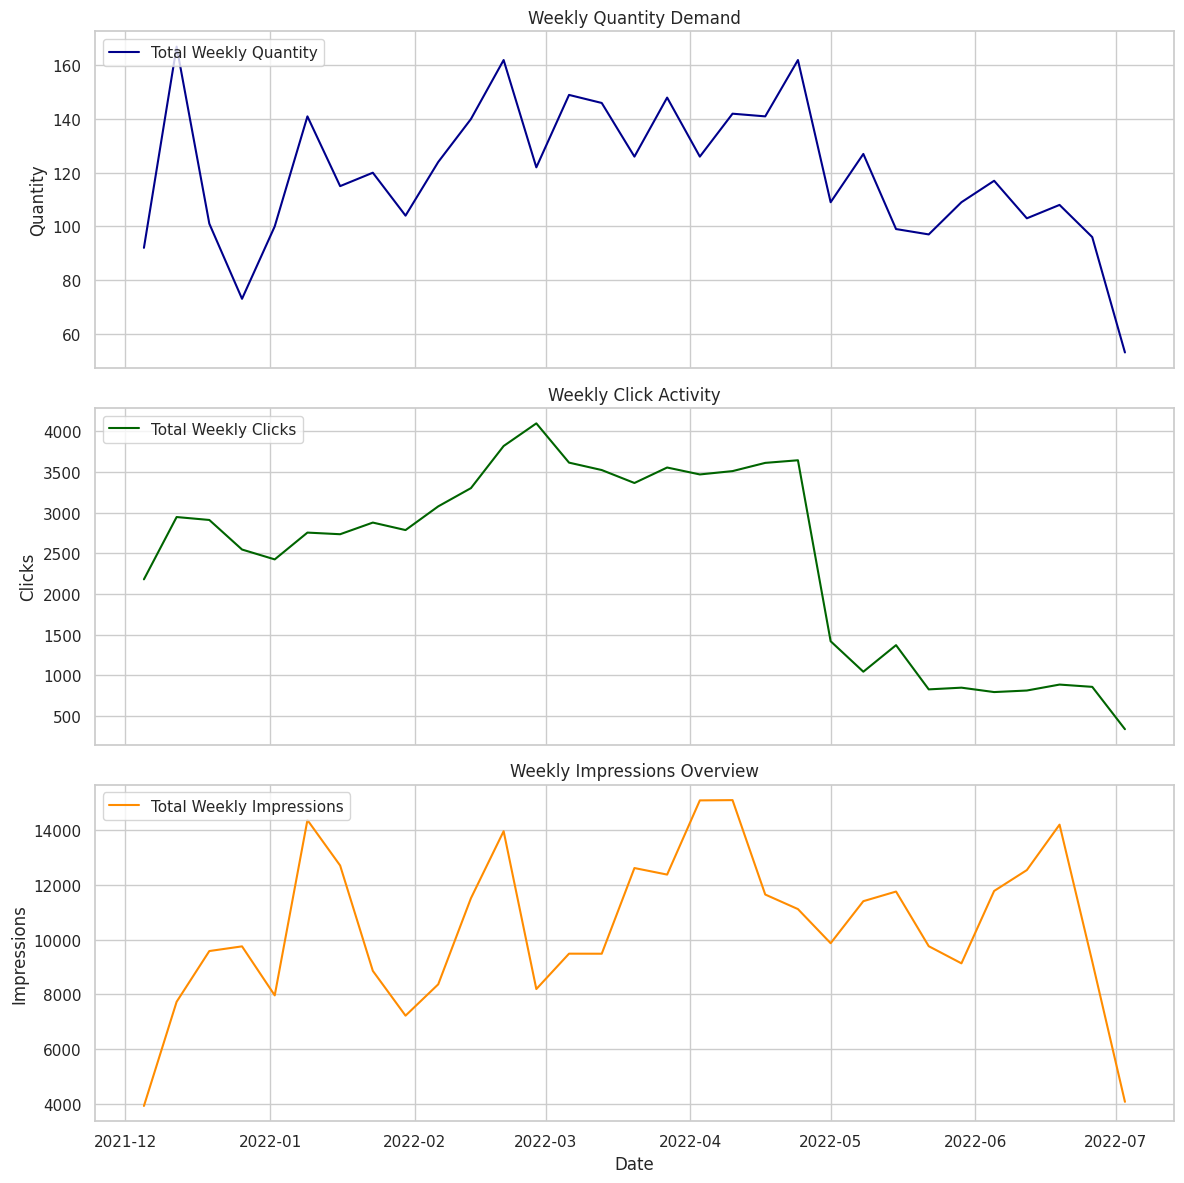

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the specified file path
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert the 'Day Index' column to datetime format
df['Day Index'] = pd.to_datetime(df['Day Index'])

# Set 'Day Index' as the DataFrame index for easier time-based operations
df.set_index('Day Index', inplace=True)

# Resample the data on a weekly basis and sum up the 'Quantity', 'Clicks', and 'Impressions' columns
weekly_summary = df.resample('W').sum()[['Quantity', 'Clicks', 'Impressions']]

# Create a figure with subplots for each metric
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12), sharex=True)

# Plotting Total Quantity on a weekly basis
axes[0].plot(weekly_summary.index, weekly_summary['Quantity'], color='darkblue', label='Total Weekly Quantity')
axes[0].set_ylabel('Quantity')
axes[0].set_title('Weekly Quantity Demand')
axes[0].legend(loc='upper left')

# Plotting Total Clicks on a weekly basis
axes[1].plot(weekly_summary.index, weekly_summary['Clicks'], color='darkgreen', label='Total Weekly Clicks')
axes[1].set_ylabel('Clicks')
axes[1].set_title('Weekly Click Activity')
axes[1].legend(loc='upper left')

# Plotting Total Impressions on a weekly basis
axes[2].plot(weekly_summary.index, weekly_summary['Impressions'], color='darkorange', label='Total Weekly Impressions')
axes[2].set_ylabel('Impressions')
axes[2].set_title('Weekly Impressions Overview')
axes[2].legend(loc='upper left')

# Set x-axis label for the last subplot
axes[2].set_xlabel('Date')

# Optimize spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()



MONTHLY DEMANDS AND TRENDS

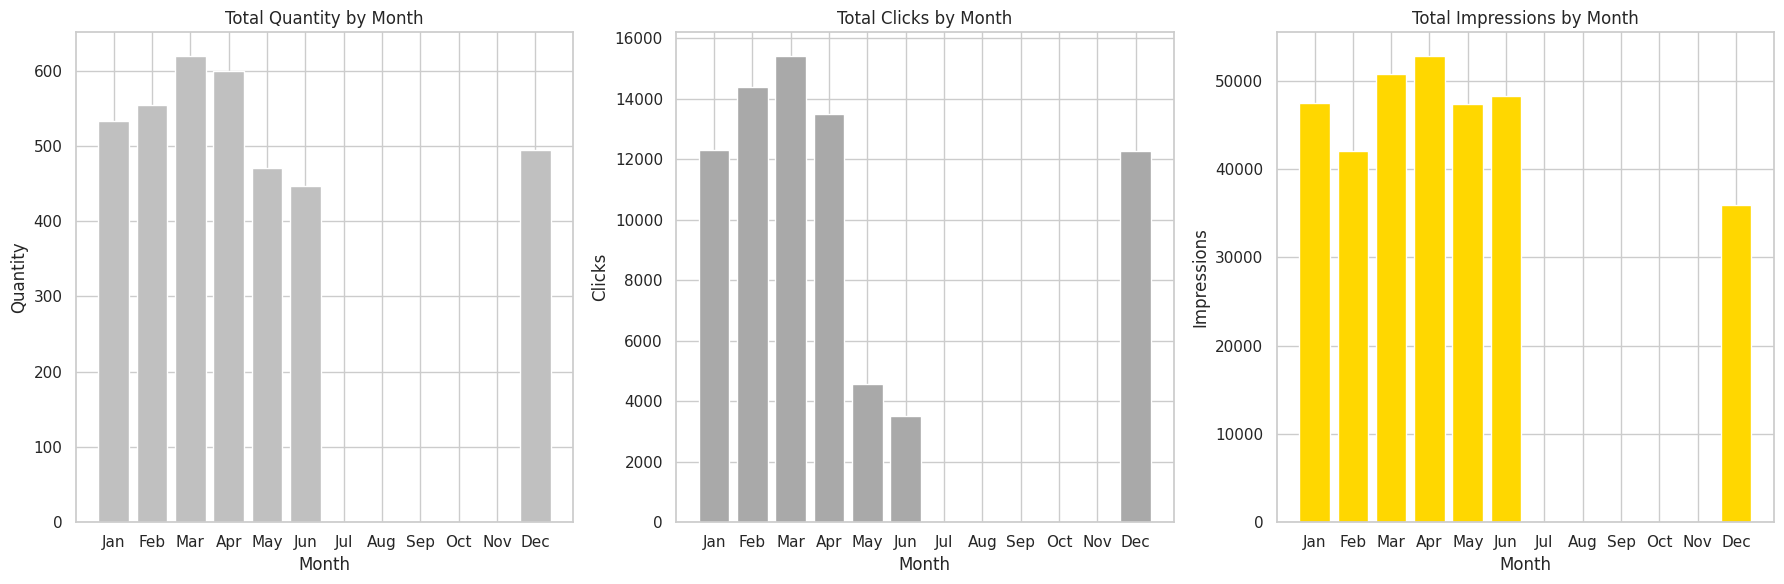

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/infosys/enhanced_data.xlsx')

# Convert 'Day Index' to datetime format and extract the Month
df['Day Index'] = pd.to_datetime(df['Day Index'])
df['Month'] = df['Day Index'].dt.month

# Calculate total values for 'Quantity', 'Clicks', and 'Impressions' per month
monthly_summary = df.groupby('Month')[['Quantity', 'Clicks', 'Impressions']].sum()

# Set up a figure for subplots with three bar charts for monthly totals
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Plot the total quantity for each month
axes[0].bar(monthly_summary.index, monthly_summary['Quantity'], color='silver')
axes[0].set_title('Total Quantity by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Quantity')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Plot the total clicks for each month
axes[1].bar(monthly_summary.index, monthly_summary['Clicks'], color='darkgray')
axes[1].set_title('Total Clicks by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Clicks')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Plot the total impressions for each month
axes[2].bar(monthly_summary.index, monthly_summary['Impressions'], color='gold')
axes[2].set_title('Total Impressions by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Impressions')
axes[2].set_xticks(range(1, 13))
axes[2].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Adjust layout for clarity and display the plot
plt.tight_layout()
plt.show()


MONTHLY TRENDS OF ORIGINAL AND IMPUTED DATA ANALYSIS

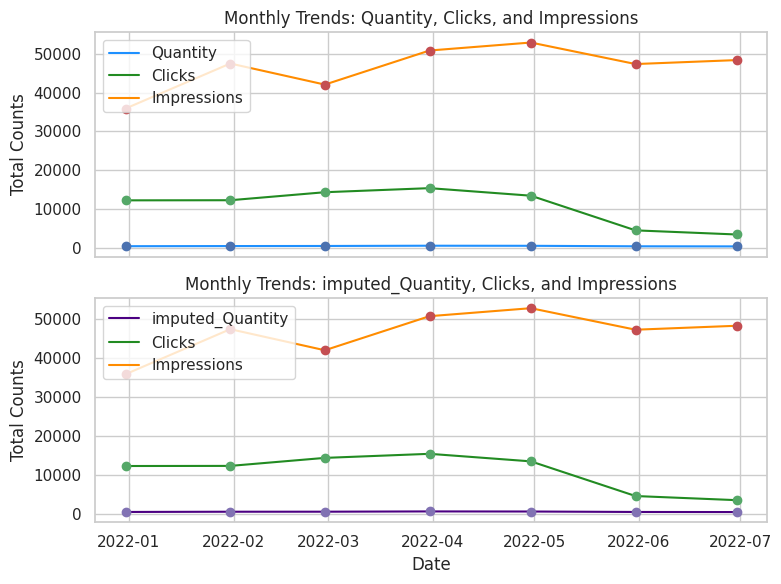

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress future warnings for cleaner output
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset from the provided file path
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' column to datetime format
df['Day Index'] = pd.to_datetime(df['Day Index'])

# Set 'Day Index' as the index for easy resampling
df.set_index('Day Index', inplace=True)

# Resample the data by month, summing up the relevant columns
monthly_summary = df.resample('M').sum()[['Quantity', 'Clicks', 'Impressions', 'imputed_Quantity']]

# Create subplots for visualizing monthly trends
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot for the first subplot: Monthly trends for Quantity, Clicks, and Impressions
axes[0].plot(monthly_summary.index, monthly_summary['Quantity'], label='Quantity', color='dodgerblue')
axes[0].plot(monthly_summary.index, monthly_summary['Clicks'], label='Clicks', color='forestgreen')
axes[0].plot(monthly_summary.index, monthly_summary['Impressions'], label='Impressions', color='darkorange')
axes[0].set_ylabel('Total Counts')
axes[0].legend(loc='upper left')
axes[0].set_title('Monthly Trends: Quantity, Clicks, and Impressions')

# Mark peaks for each metric in the first subplot
for date in monthly_summary.index:
    # Get the peak values for Quantity, Clicks, and Impressions
    peak_quantity = monthly_summary.loc[date, 'Quantity']
    peak_clicks = monthly_summary.loc[date, 'Clicks']
    peak_impressions = monthly_summary.loc[date, 'Impressions']

    # Mark the peaks on the plot
    axes[0].plot(date, peak_quantity, 'bo')
    axes[0].plot(date, peak_clicks, 'go')
    axes[0].plot(date, peak_impressions, 'ro')

# Plot for the second subplot: Monthly trends for imputed_Quantity, Clicks, and Impressions
axes[1].plot(monthly_summary.index, monthly_summary['imputed_Quantity'], label='imputed_Quantity', color='indigo')
axes[1].plot(monthly_summary.index, monthly_summary['Clicks'], label='Clicks', color='forestgreen')
axes[1].plot(monthly_summary.index, monthly_summary['Impressions'], label='Impressions', color='darkorange')
axes[1].set_ylabel('Total Counts')
axes[1].legend(loc='upper left')
axes[1].set_title('Monthly Trends: imputed_Quantity, Clicks, and Impressions')

# Mark peaks for each metric in the second subplot
for date in monthly_summary.index:
    # Get the peak values for imputed_Quantity, Clicks, and Impressions
    peak_imputed_quantity = monthly_summary.loc[date, 'imputed_Quantity']
    peak_clicks_2 = monthly_summary.loc[date, 'Clicks']
    peak_impressions_2 = monthly_summary.loc[date, 'Impressions']

    # Mark the peaks on the plot
    axes[1].plot(date, peak_imputed_quantity, 'mo')
    axes[1].plot(date, peak_clicks_2, 'go')
    axes[1].plot(date, peak_impressions_2, 'ro')

# Label the x-axis of the second subplot
axes[1].set_xlabel('Date')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


Percentage Distribution of Daily Clicks and Impressions by Day of the Week

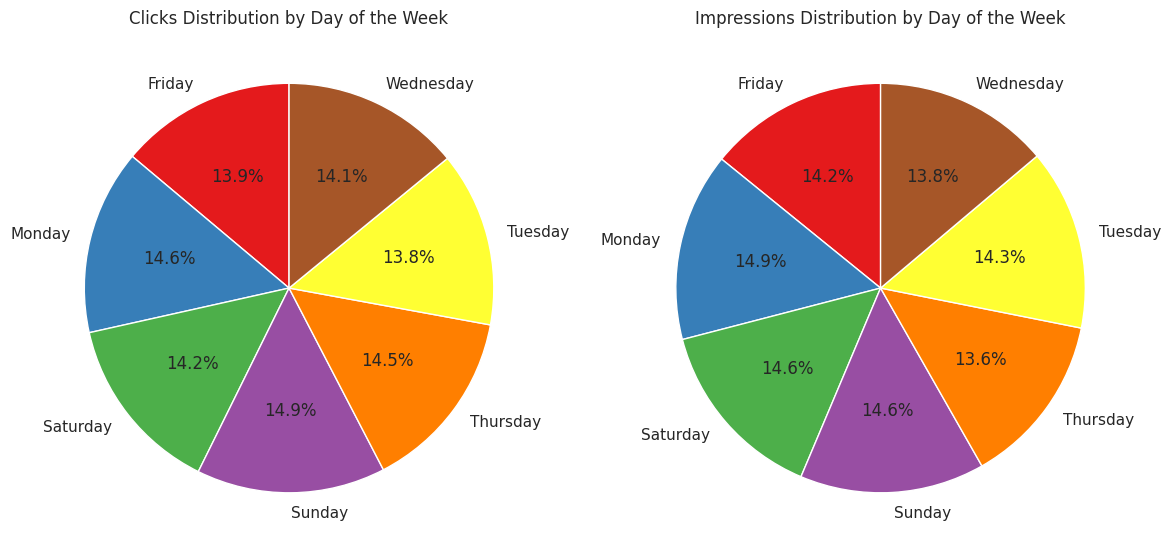

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert the 'Day Index' column to datetime format
df['Day Index'] = pd.to_datetime(df['Day Index'])

# Create a new column 'Weekday' to represent the day of the week for grouping
df['Weekday'] = df['Day Index'].dt.day_name()

# Aggregate the data by 'Weekday' and calculate total Clicks and Impressions
weekly_summary = df.groupby('Weekday')[['Clicks', 'Impressions']].sum()

# Calculate the percentage representation of Clicks and Impressions for each weekday
percentage_data = weekly_summary / weekly_summary.sum() * 100

# Create a figure with two subplots to visualize the data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for Clicks percentage by Weekday
ax[0].pie(percentage_data['Clicks'], labels=percentage_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
ax[0].set_title('Clicks Distribution by Day of the Week')

# Plot the pie chart for Impressions percentage by Weekday
ax[1].pie(percentage_data['Impressions'], labels=percentage_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
ax[1].set_title('Impressions Distribution by Day of the Week')

# Adjust the layout for better visual presentation
plt.tight_layout()
plt.show()



CORRELATION :

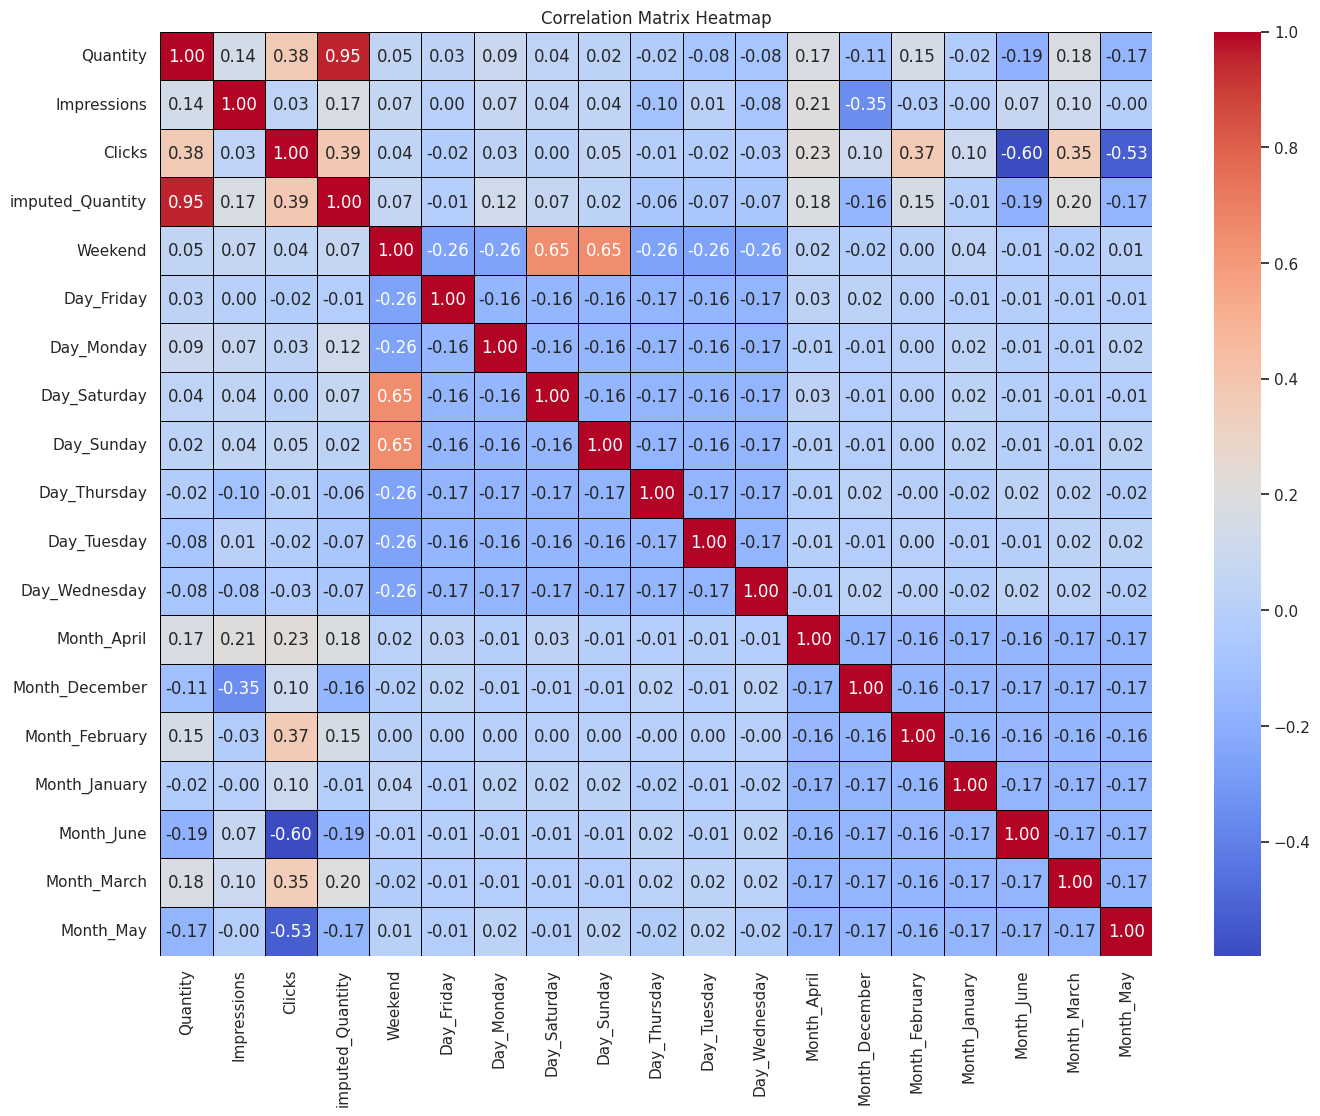

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset (ensure this path is correct)
dataset_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
dataset = pd.read_excel(dataset_path)

# Extract numerical columns from the dataset for correlation analysis
numerical_columns = dataset.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_columns.corr()

# Set up the plot size for better visibility
plt.figure(figsize=(16, 12))

# Create a heatmap to visualize correlations with annotations and color customization
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')
plt.title("Correlation Matrix Heatmap")
plt.show()